## Problem statement:

#### Insurance domain: We have a simple dataset with 2 features age of a person+that person is buying an insurance or not.
#### We need to create a predictive model, which will predict either
#### than person with a perticular age will buy or not

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [49]:
df.bought_insurance.unique()#We have 0,1 as a dependent value so its binary classification probelm

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

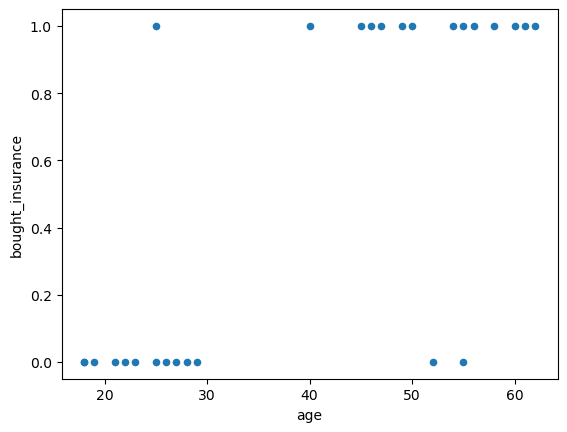

In [50]:
df.plot.scatter(x='age',y='bought_insurance')

In [51]:
df.shape

(27, 2)

In [52]:
x = df[['age']]

In [53]:
y = df.bought_insurance

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [57]:
x_train[:5]

,age
16,25
17,58
12,27
24,50
1,25


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
LR = LogisticRegression()
LR

LogisticRegression()

## Training

In [60]:
LR.fit(x_train,y_train)

LogisticRegression()

In [61]:
LR.score(x_train,y_train)*100

85.71428571428571

## Testing

In [62]:
LR.predict([[25]])

array([0], dtype=int64)

In [63]:
LR.predict([[60]])

array([1], dtype=int64)

#### y_pred = 1 / 1 + e ^ (-y)
#### y_pred give u a probablity

In [64]:
from math import e

In [65]:
e

2.718281828459045

In [66]:
m = LR.coef_
m

array([[0.11307718]])

In [67]:
c = LR.intercept_
c

array([-4.15312723])

In [68]:
#check the probability for age 
age = [24,54,62,28,35,19]
for i in age:
    prob = 1/(1+e**(-(m*i+c)))
    if prob >=0.5:
        print('A person with age',i,'will buy an insurance with proba.',round(float(prob),2)*100,'%')
    else:
        print('A person with age',i,'will not buy an insurance with proba.',round(float(prob),2)*100,'%')   

A person with age 24 will not buy an insurance with proba. 19.0 %
A person with age 54 will buy an insurance with proba. 88.0 %
A person with age 62 will buy an insurance with proba. 95.0 %
A person with age 28 will not buy an insurance with proba. 27.0 %
A person with age 35 will not buy an insurance with proba. 45.0 %
A person with age 19 will not buy an insurance with proba. 12.0 %


In [69]:
age = int(input('Enter the age:'))
pr = LR.predict([[age]])
pr

Enter the age:22


array([0], dtype=int64)

In [70]:
# predict_proba gives 2 values
#prob.of 0 | prob.of 1
LR.predict_proba([[55]])

array([[0.11243387, 0.88756613]])

In [71]:
LR.predict_proba([[25]])

array([[0.79021099, 0.20978901]])

In [72]:
X_test = df.sample(10)
x_test[:3]

,age
8,62
13,29
9,61


In [74]:
# SELECT RANDOM 10 SAMPLES FROM X
test =X_test[['age']]
test

,age
12,27
20,21
13,29
5,56
16,25
14,49
0,22
19,18
9,61
6,55


In [75]:
print(test.values)

[[27]
 [21]
 [29]
 [56]
 [25]
 [49]
 [22]
 [18]
 [61]
 [55]]


In [76]:
y_pred = LR.predict(test)
y_pred
#predicted result

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [77]:
y_true = X_test.bought_insurance.values
y_true

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

### Can we apply regression measures in logistic regression
### ans : No

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [79]:
mean_absolute_error(y_true,y_pred)

0.2

In [80]:
mean_squared_error(y_true,y_pred)

0.2

### Use Log loss in case of Logistic regression

In [81]:
from sklearn.metrics import log_loss

In [82]:
log_loss(y_true,y_pred)

6.907835238725157

### Can we apply classification accuracy measures over logistic regression???
### Ans: YES

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_true,y_pred)

array([[5, 1],
       [1, 3]], dtype=int64)

In [85]:
# TP
# TN
# FP
# FN

In [86]:
#check TP
# braught_insurance == 1 means positive case
sum(y_true == 1) #actual 1

4

In [87]:
sum(y_pred == 1) # predicted 1

4

In [88]:
# Actual its 1 and predicted as 1: TP
sum((y_true == 1) & (y_pred==1))

3

In [89]:
# Actual its 0 and predicted as 0: TN
sum((y_true == 0) & (y_pred==0))

5

In [90]:
# Actual its 0 and predicted as 1: FP
sum((y_true == 0) & (y_pred==1))

1

In [91]:
# Actual its 1 and predicted as 0: FN
sum((y_true == 1) & (y_pred==0))

1

<AxesSubplot:>

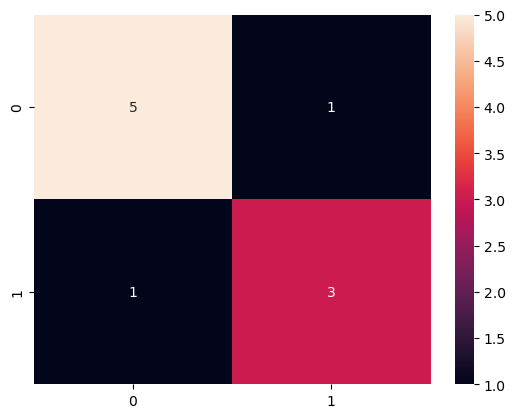

In [92]:
import seaborn as sns
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True)

Text(0.5, 1.0, 'Confusion Matrix for Insurance')

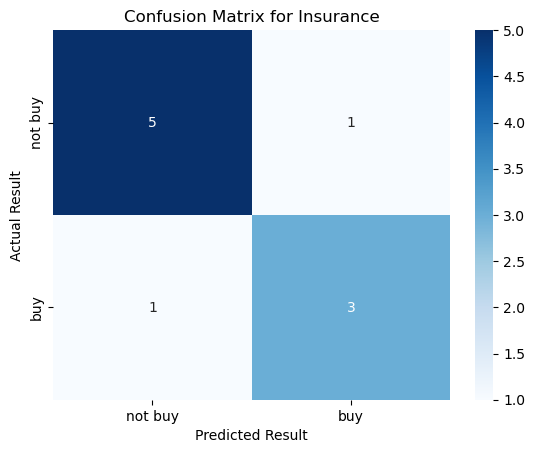

In [93]:
ax = sns.heatmap(cm,annot=True,xticklabels=['not buy','buy'],
           yticklabels=['not buy','buy'],cmap='Blues')
ax.set_xlabel('Predicted Result')
ax.set_ylabel('Actual Result')
ax.set_title('Confusion Matrix for Insurance')

In [94]:
# Lets check precision and recall
from sklearn.metrics import precision_score,recall_score

In [95]:
precision_score(y_true,y_pred)
# FP = 0

0.75

In [96]:
recall_score(y_true,y_pred)
# FN = 0

0.75

In [97]:
# check f1 score
from sklearn.metrics import f1_score

In [98]:
f1_score(y_true,y_pred)

0.75

In [99]:
# check accuracy
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_true,y_pred)

0.8

### Lets combine all these together

In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [103]:
sum(y_true == 0)

6